# To Do on Friday
- Do Pop vs Rap Clustering Accuracy for larger set -- second part
- Try to do explicit clustering with different GMM component numbers (17 explicit, x clean)

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split


In [136]:
dat = pd.read_csv("archive/data.csv")
dat_artist = pd.read_csv("archive/data_by_artist.csv")
dat_genres = pd.read_csv("archive/data_by_genres.csv")
dat_year = pd.read_csv("archive/data_by_year.csv")
dat_w_genres = pd.read_csv("archive/data_w_genres.csv")

# Smaller Clustering

In [137]:
dat.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [138]:
# Fix issue with genres list
dat_w_genres["genres"] = dat_w_genres["genres"].apply(lambda x: x.replace("'", "").strip('][').split(', '))


In [139]:
# will leave in empty list for one-genre, shouldn't be an issue
dat_w_genres = dat_w_genres[[True if (len(dat_w_genres.loc[i, "genres"]) == 1) else False for i in range(len(dat_w_genres))]]
dat_w_genres = dat_w_genres.reset_index(drop = True)

In [140]:
def query_artist(artist):
    return [True if dat["artists"][i] == [artist] else False for i in range(len(dat["artists"]))]

dat["artists"] = dat["artists"].apply(lambda x: x.replace("'", "").strip('][').split(', '))

In [141]:
classical_artists = dat_w_genres[[True if "classical" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]

pop_artists = dat_w_genres[[True if "pop" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
pop_artists.head()

249       Alaina Castillo
307         Alec Benjamin
684          Ant Saunders
918           Audrey Mika
1441             Blue Ivy
1619         Brendon Urie
2229     Christian French
4679     Grace VanderWaal
4844               H.E.R.
5876        Jeremy Zucker
6182          John Newman
7013                  LSD
7047             Labrinth
7145                 Lauv
7816                 MIKA
8242         Mary Lambert
8424              Melanie
8426     Melanie Martinez
11039                SYML
11592        Social House
11950       Summer Walker
13986         Zhavia Ward
14038               gnash
Name: artists, dtype: object

In [142]:
classical_artists = classical_artists["artists"]
classical_artists.head()

6047     Joaquín Rodrigo
13589    Walter Susskind
Name: artists, dtype: object

In [143]:
country_artists = dat_w_genres[[True if "country" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
country_artists.head()

855      Artists Of Then, Now & Forever
1359                       Billy Gilman
1367                    Billy Ray Cyrus
3206                      Doug Supernaw
3681                     Eric Heatherly
4872                        Hal Ketchum
5170                         Holly Dunn
6202                     John Schneider
6541                         K.T. Oslin
6670                       Kathy Mattea
7189                      Lee Greenwood
7201                    Lee Roy Parnell
8159                        Mark Collie
8263                       Mason Ramsey
9773                    Paul Overstreet
12086                   T. Graham Brown
12851                      The Tractors
Name: artists, dtype: object

Classical, Country, Electronic dance music (EDM), Hip-hop ,Indie rock ,Jazz, K-pop, Metal, Oldies, Pop, Rap, Rhythm & blues (R&B), Rock


In [144]:
edm_artists = dat_w_genres[[True if "edm" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
hiphop_artists = dat_w_genres[[True if "hip hop" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
indierock_artists = dat_w_genres[[True if "indie rock" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
jazz_artists = dat_w_genres[[True if "jazz" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
kpop_artists = dat_w_genres[[True if "k-pop" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
metal_artists = dat_w_genres[[True if "metal" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
# No oldies for spotify that I could find
oldies_artists = dat_w_genres[[True if "oldies" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
rap_artists = dat_w_genres[[True if "rap" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
randb_artists = dat_w_genres[[True if "r&b" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
rock_artists = dat_w_genres[[True if "rock" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]


In [145]:
#rock_artists

In [146]:
possible_pop = dat[[pop_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_classical = dat[[classical_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_country = dat[[country_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]

In [149]:
possible_edm = dat[[edm_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_hiphop = dat[[hiphop_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_indierock = dat[[indierock_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]


In [150]:
possible_jazz = dat[[jazz_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_kpop = dat[[kpop_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_metal = dat[[metal_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]


In [151]:
possible_rap = dat[[rap_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_randb = dat[[randb_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_rock = dat[[rock_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]


In [225]:
pop = possible_pop[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
pop["genre"] = "pop"

classical = possible_classical[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
classical["genre"] = "classical"

country = possible_country[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
country["genre"] = "country"

edm = possible_edm[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
edm["genre"] = "edm"

hiphop = possible_hiphop[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
hiphop["genre"] = "hiphop"

indierock = possible_indierock[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
indierock["genre"] = "indierock"

jazz = possible_jazz[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
jazz["genre"] = "jazz"

kpop = possible_kpop[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
kpop["genre"] = "kpop"

metal = possible_metal[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
metal["genre"] = "metal"

rap = possible_rap[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
rap["genre"] = "rap"

randb = possible_randb[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
randb["genre"] = "randb"

rock = possible_rock[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
rock["genre"] = "rock"

# Choose Genres
X = pd.concat([pop, rap])

In [226]:
X.head()

,acousticness,danceability,energy,year,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,key,mode,loudness,explicit,duration_ms,genre
7295,0.5870,0.600,0.569,2012,0,0.0,8,0.1020,-5.729,1,0.0269,101.942,0.1100,8,1,-5.729,0,212293,pop
7729,0.7750,0.548,0.221,2016,0,0.0,0,0.1090,-8.383,1,0.0401,140.649,0.4570,0,1,-8.383,0,148840,pop
7795,0.4900,0.515,0.195,2017,0,0.0,9,0.0818,-13.635,0,0.1120,169.544,0.0638,9,0,-13.635,0,121429,pop
7887,0.0542,0.768,0.408,2018,1,0.0,4,0.1060,-8.551,0,0.0714,129.960,0.0905,4,0,-8.551,1,179915,pop
8021,0.4880,0.832,0.655,2019,1,0.0,3,0.1030,-6.195,0,0.0676,94.998,0.7830,3,0,-6.195,1,236973,pop


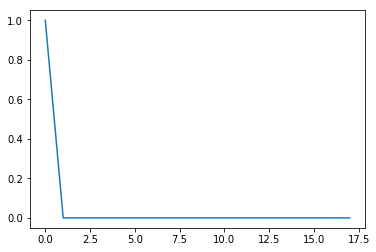

In [227]:
pca = PCA(n_components=18)
y = X["genre"]
X = X[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
pca.fit(X)
pcavar = pca.explained_variance_ratio_
plt.plot(pcavar)

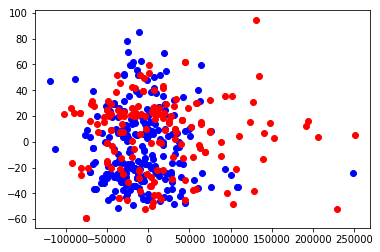

In [228]:
pca_mod = PCA(n_components=2)
pcadat = pca_mod.fit_transform(X)
d = pd.DataFrame(data=pcadat, columns=["Principal Component 1", "PC2"])
pops = d[(y == "pop").reset_index(drop = True)]
raps = d[(y == "rap").reset_index(drop = True)]
plt.plot(pops["Principal Component 1"], pops["PC2"], 'bo', raps["Principal Component 1"], raps["PC2"], 'ro')

In [229]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
popsongs = X_train[y_train == "pop"]
poplabels = y_train[y_train == "pop"]

rapsongs = X_train[y_train == "rap"]
raplabels = y_train[y_train == "rap"]

In [231]:
# Look for best clustering
train_labels = train_labels.reset_index(drop = True)
test_labels = test_labels.reset_index(drop = True)

### STUDENT START ###
dat = pd.DataFrame(columns=["Type of Covariance", "Number of PCA Components", "Number of GMM Components", "Parameters", "Accuracy"])
l = 0
    
    # Start of Function
    # Values of PCA Components
for i in range(1, 18):
        # Fit the PCA, get Pos and Neg
    pca_mod = PCA(n_components=i)
    pcadat=pca_mod.fit_transform(train_data) 
    data = pd.DataFrame(data=pcadat)
        
    pca_mod2 = PCA(n_components = i)
    pcadat2 = pca_mod2.fit_transform(test_data) 
    data2 = pd.DataFrame(data=pcadat2)
            
    popsongs = data[train_labels == "pop"]
    poplabels = train_labels[train_labels == "pop"]
    

    rapsongs = data[train_labels == "rap"]
    raplabels = train_labels[train_labels == "rap"]
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        
        params = 2 * (j + (j - 1) + (j*np.sum(range(1, i+1))))
                
        modelpop = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelpop.fit(popsongs, poplabels)
        
        modelrap = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelrap.fit(rapsongs, raplabels)
            
        poslik = modelpop.score_samples(data2)
        neglik = modelrap.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            if poslik[k] > neglik[k]:
                labs.append("pop")
            else:
                labs.append("rap")
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Full", i, j, params, totalacc]
        l += 1
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        params = 2 * ((2*j - 1) + i*j)
            
        modelpos = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelpos.fit(popsongs, poplabels)
        
        modelneg = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelneg.fit(rapsongs, raplabels)
            
        poslik = modelpos.score_samples(data2)
        neglik = modelneg.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            if poslik[k] > neglik[k]:
                labs.append("pop")
            else:
                labs.append("rap")
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Diag", i, j, params, totalacc]
        l += 1
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        params = 2 * (3*j - 1)
            
        modelpos = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelpos.fit(popsongs, poplabels)
        
        modelneg = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelneg.fit(rapsongs, raplabels)
            
        poslik = modelpos.score_samples(data2)
        neglik = modelneg.score_samples(data2)
            
            # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            if poslik[k] > neglik[k]:
                labs.append("pop")
            else:
                labs.append("rap")
    
            # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Spherical", i, j, params, totalacc]
        l += 1
        
    for j in range(1, 13):
        params = 2 * (np.sum(range(1, i)) + 2*j - 1)
                
        modelpos = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelpos.fit(popsongs, poplabels)
                
        modelneg = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelneg.fit(rapsongs, raplabels)
                
        poslik = modelpos.score_samples(data2)
        neglik = modelneg.score_samples(data2)
                
                # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            if poslik[k] > neglik[k]:
                labs.append("pop")
            else:
                labs.append("rap")
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Tied", i, j, params, totalacc]
        l += 1

dat[dat["Accuracy"] == max(dat["Accuracy"])]

,Type of Covariance,Number of PCA Components,Number of GMM Components,Parameters,Accuracy
144,Full,5,1,32,0.771084
168,Tied,5,1,22,0.771084


# Same process for all 12 genres

In [236]:
# Run for 13 models (Below are the only ones with more than 20 observations)
X = pd.concat([pop, rap, country, hiphop, kpop, randb])

y = X["genre"]
X = X[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
train_labels = train_labels.reset_index(drop = True)
test_labels = test_labels.reset_index(drop = True)

### STUDENT START ###
dat = pd.DataFrame(columns=["Type of Covariance", "Number of PCA Components", "Number of GMM Components", "Parameters", "Accuracy"])
l = 0
    
    # Start of Function
    # Values of PCA Components
for i in range(1, 18):
        # Fit the PCA, get Pos and Neg
    pca_mod = PCA(n_components=i)
    pcadat=pca_mod.fit_transform(train_data) 
    data = pd.DataFrame(data=pcadat)
        
    pca_mod2 = PCA(n_components = i)
    pcadat2 = pca_mod2.fit_transform(test_data) 
    data2 = pd.DataFrame(data=pcadat2)
            
    popsongs = data[train_labels == "pop"]
    poplabels = train_labels[train_labels == "pop"]
    
    #classicalsongs = data[train_labels == "classical"]
    #classicallabels = train_labels[train_labels == "classical"]
    
    hiphopsongs = data[train_labels == "hiphop"]
    hiphoplabels = train_labels[train_labels == "hiphop"]
    
    #jazzsongs = data[train_labels == "jazz"]
    #jazzlabels = train_labels[train_labels == "jazz"]
    
    #indierocksongs = data[train_labels == "indierock"]
    #indierocklabels = train_labels[train_labels == "indierock"]
    
    #rocksongs = data[train_labels == "rock"]
    #rocklabels = train_labels[train_labels == "rock"]
    
    #edmsongs = data[train_labels == "edm"]
    #edmlabels = train_labels[train_labels == "edm"]
    
    countrysongs = data[train_labels == "country"]
    countrylabels = train_labels[train_labels == "country"]
    
    kpopsongs = data[train_labels == "kpop"]
    kpoplabels = train_labels[train_labels == "kpop"]
    
    #metalsongs = data[train_labels == "metal"]
    #metallabels = train_labels[train_labels == "metal"]
    
    randbsongs = data[train_labels == "randb"]
    randblabels = train_labels[train_labels == "randb"]

    rapsongs = data[train_labels == "rap"]
    raplabels = train_labels[train_labels == "rap"]
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        
        params = 2 * (j + (j - 1) + (j*np.sum(range(1, i+1))))
                
        modelpop = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelpop.fit(popsongs, poplabels)
        
        modelhiphop = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelhiphop.fit(hiphopsongs, hiphoplabels)
        
        #modeljazz = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        #modeljazz.fit(jazzsongs, jazzlabels)
        
        #modelclassical = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        #modelclassical.fit(classicalsongs, classicallabels)
        
        #modeledm = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        #modeledm.fit(edmsongs, edmlabels)
        
        modelcountry = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelcountry.fit(countrysongs, countrylabels)
        
        modelrandb = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelrandb.fit(randbsongs, randblabels)
        
        #modelindierock = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        #modelindierock.fit(indierocksongs, indierocklabels)
        
        #modelmetal = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        #modelmetal.fit(metalsongs, metallabels)
        
        modelkpop = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelkpop.fit(kpopsongs, kpoplabels)
        
        #modelrock = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        #modelrock.fit(rocksongs, rocklabels)
        
        modelrap = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelrap.fit(rapsongs, raplabels)
            
        lik1 = modelpop.score_samples(data2)
        lik2 = modelrap.score_samples(data2)
        #lik3 = modeledm.score_samples(data2)
        #lik4 = modelrock.score_samples(data2)
        #lik5 = modelindierock.score_samples(data2)
        #lik6 = modeljazz.score_samples(data2)
        lik7 = modelcountry.score_samples(data2)
        #lik8 = modelclassical.score_samples(data2)
        lik9 = modelkpop.score_samples(data2)
        #lik10 = modelmetal.score_samples(data2)
        lik11 = modelrandb.score_samples(data2)
        lik12 = modelhiphop.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            vals = [lik1[k], lik2[k], lik7[k], lik9[k], lik11[k], lik12[k]]
            if np.argmax(vals) == 0:
                labs.append("pop")
            elif np.argmax(vals) == 1:
                labs.append("rap")
            #elif np.argmax(vals) == 2:
                #labs.append("edm")
            #elif np.argmax(vals) == 3:
             #   labs.append("rock")
            #elif np.argmax(vals) == 4:
             #   labs.append("indierock")
            #elif np.argmax(vals) == 5:
             #   labs.append("jazz")
            elif np.argmax(vals) == 2:
                labs.append("country")
            #elif np.argmax(vals) == 7:
             #   labs.append("classical")
            elif np.argmax(vals) == 3:
                labs.append("kpop")
            #elif np.argmax(vals) == 9:
             #   labs.append("metal")
            elif np.argmax(vals) == 4:
                labs.append("randb")
            else:
                labs.append("hiphop")
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Full", i, j, params, totalacc]
        l += 1
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        params = 2 * ((2*j - 1) + i*j)
            
        modelpop = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelpop.fit(popsongs, poplabels)
        
        modelhiphop = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelhiphop.fit(hiphopsongs, hiphoplabels)
        
        #modeljazz = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        #modeljazz.fit(jazzsongs, jazzlabels)
        
        #modelclassical = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        #modelclassical.fit(classicalsongs, classicallabels)
        
        #modeledm = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        #modeledm.fit(edmsongs, edmlabels)
        
        modelcountry = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelcountry.fit(countrysongs, countrylabels)
        
        modelrandb = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelrandb.fit(randbsongs, randblabels)
        
        #modelindierock = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        #modelindierock.fit(indierocksongs, indierocklabels)
        
        #modelmetal = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        #modelmetal.fit(metalsongs, metallabels)
        
        modelkpop = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelkpop.fit(kpopsongs, kpoplabels)
        
        #modelrock = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        #modelrock.fit(rocksongs, rocklabels)
        
        modelrap = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelrap.fit(rapsongs, raplabels)
            
        lik1 = modelpop.score_samples(data2)
        lik2 = modelrap.score_samples(data2)
        #lik3 = modeledm.score_samples(data2)
        #lik4 = modelrock.score_samples(data2)
        #lik5 = modelindierock.score_samples(data2)
        #lik6 = modeljazz.score_samples(data2)
        lik7 = modelcountry.score_samples(data2)
        #lik8 = modelclassical.score_samples(data2)
        lik9 = modelkpop.score_samples(data2)
        #lik10 = modelmetal.score_samples(data2)
        lik11 = modelrandb.score_samples(data2)
        lik12 = modelhiphop.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            vals = [lik1[k], lik2[k], lik7[k], lik9[k], lik11[k], lik12[k]]
            if np.argmax(vals) == 0:
                labs.append("pop")
            elif np.argmax(vals) == 1:
                labs.append("rap")
            #elif np.argmax(vals) == 2:
                #labs.append("edm")
            #elif np.argmax(vals) == 3:
             #   labs.append("rock")
            #elif np.argmax(vals) == 4:
             #   labs.append("indierock")
            #elif np.argmax(vals) == 5:
             #   labs.append("jazz")
            elif np.argmax(vals) == 2:
                labs.append("country")
            #elif np.argmax(vals) == 7:
             #   labs.append("classical")
            elif np.argmax(vals) == 3:
                labs.append("kpop")
            #elif np.argmax(vals) == 9:
             #   labs.append("metal")
            elif np.argmax(vals) == 4:
                labs.append("randb")
            else:
                labs.append("hiphop")
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Diag", i, j, params, totalacc]
        l += 1
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        params = 2 * (3*j - 1)
            
        modelpop = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelpop.fit(popsongs, poplabels)
        
        modelhiphop = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelhiphop.fit(hiphopsongs, hiphoplabels)
        
        #modeljazz = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        #modeljazz.fit(jazzsongs, jazzlabels)
        
        #modelclassical = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        #modelclassical.fit(classicalsongs, classicallabels)
        
        #modeledm = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        #modeledm.fit(edmsongs, edmlabels)
        
        modelcountry = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelcountry.fit(countrysongs, countrylabels)
        
        modelrandb = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelrandb.fit(randbsongs, randblabels)
        
        #modelindierock = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        #modelindierock.fit(indierocksongs, indierocklabels)
        
        #modelmetal = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        #modelmetal.fit(metalsongs, metallabels)
        
        modelkpop = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelkpop.fit(kpopsongs, kpoplabels)
        
        #modelrock = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        #modelrock.fit(rocksongs, rocklabels)
        
        modelrap = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelrap.fit(rapsongs, raplabels)
            
        lik1 = modelpop.score_samples(data2)
        lik2 = modelrap.score_samples(data2)
        #lik3 = modeledm.score_samples(data2)
        #lik4 = modelrock.score_samples(data2)
        #lik5 = modelindierock.score_samples(data2)
        #lik6 = modeljazz.score_samples(data2)
        lik7 = modelcountry.score_samples(data2)
        #lik8 = modelclassical.score_samples(data2)
        lik9 = modelkpop.score_samples(data2)
        #lik10 = modelmetal.score_samples(data2)
        lik11 = modelrandb.score_samples(data2)
        lik12 = modelhiphop.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            vals = [lik1[k], lik2[k], lik7[k], lik9[k], lik11[k], lik12[k]]
            if np.argmax(vals) == 0:
                labs.append("pop")
            elif np.argmax(vals) == 1:
                labs.append("rap")
            #elif np.argmax(vals) == 2:
                #labs.append("edm")
            #elif np.argmax(vals) == 3:
             #   labs.append("rock")
            #elif np.argmax(vals) == 4:
             #   labs.append("indierock")
            #elif np.argmax(vals) == 5:
             #   labs.append("jazz")
            elif np.argmax(vals) == 2:
                labs.append("country")
            #elif np.argmax(vals) == 7:
             #   labs.append("classical")
            elif np.argmax(vals) == 3:
                labs.append("kpop")
            #elif np.argmax(vals) == 9:
             #   labs.append("metal")
            elif np.argmax(vals) == 4:
                labs.append("randb")
            else:
                labs.append("hiphop")
    
            # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Spherical", i, j, params, totalacc]
        l += 1
        
    for j in range(1, 13):
        params = 2 * (np.sum(range(1, i)) + 2*j - 1)
                
        modelpop = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelpop.fit(popsongs, poplabels)
                
        modelhiphop = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelhiphop.fit(hiphopsongs, hiphoplabels)
        
        #modeljazz = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        #modeljazz.fit(jazzsongs, jazzlabels)
        
        #modelclassical = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        #modelclassical.fit(classicalsongs, classicallabels)
        
        #modeledm = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        #modeledm.fit(edmsongs, edmlabels)
        
        modelcountry = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelcountry.fit(countrysongs, countrylabels)
        
        modelrandb = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelrandb.fit(randbsongs, randblabels)
        
        #modelindierock = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        #modelindierock.fit(indierocksongs, indierocklabels)
        
        #modelmetal = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        #modelmetal.fit(metalsongs, metallabels)
        
        modelkpop = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelkpop.fit(kpopsongs, kpoplabels)
        
        #modelrock = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        #modelrock.fit(rocksongs, rocklabels)
        
        modelrap = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelrap.fit(rapsongs, raplabels)
            
        lik1 = modelpop.score_samples(data2)
        lik2 = modelrap.score_samples(data2)
        #lik3 = modeledm.score_samples(data2)
        #lik4 = modelrock.score_samples(data2)
        #lik5 = modelindierock.score_samples(data2)
        #lik6 = modeljazz.score_samples(data2)
        lik7 = modelcountry.score_samples(data2)
        #lik8 = modelclassical.score_samples(data2)
        lik9 = modelkpop.score_samples(data2)
        #lik10 = modelmetal.score_samples(data2)
        lik11 = modelrandb.score_samples(data2)
        lik12 = modelhiphop.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            vals = [lik1[k], lik2[k], lik7[k], lik9[k], lik11[k], lik12[k]]
            if np.argmax(vals) == 0:
                labs.append("pop")
            elif np.argmax(vals) == 1:
                labs.append("rap")
            #elif np.argmax(vals) == 2:
                #labs.append("edm")
            #elif np.argmax(vals) == 3:
             #   labs.append("rock")
            #elif np.argmax(vals) == 4:
             #   labs.append("indierock")
            #elif np.argmax(vals) == 5:
             #   labs.append("jazz")
            elif np.argmax(vals) == 2:
                labs.append("country")
            #elif np.argmax(vals) == 7:
             #   labs.append("classical")
            elif np.argmax(vals) == 3:
                labs.append("kpop")
            #elif np.argmax(vals) == 9:
             #   labs.append("metal")
            elif np.argmax(vals) == 4:
                labs.append("randb")
            else:
                labs.append("hiphop")
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Tied", i, j, params, totalacc]
        l += 1

dat[dat["Accuracy"] == max(dat["Accuracy"])]

C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


,Type of Covariance,Number of PCA Components,Number of GMM Components,Parameters,Accuracy
405,Diag,12,2,54,0.445783
427,Tied,12,8,162,0.445783
473,Full,14,6,1282,0.445783
482,Diag,14,7,222,0.445783
483,Diag,14,8,254,0.445783
509,Full,15,6,1462,0.445783
518,Diag,15,7,236,0.445783
519,Diag,15,8,270,0.445783
545,Full,16,6,1654,0.445783
554,Diag,16,7,250,0.445783


# Larger Clustering (13 types)

In [2]:
dat = pd.read_csv("archive/data.csv")
dat_artist = pd.read_csv("archive/data_by_artist.csv")
dat_genres = pd.read_csv("archive/data_by_genres.csv")
dat_year = pd.read_csv("archive/data_by_year.csv")
dat_w_genres = pd.read_csv("archive/data_w_genres.csv")

In [3]:
dat["artists"] = dat["artists"].apply(lambda x: x.replace("'", "").strip('][').split(', '))

In [4]:
classical_artists = dat_w_genres[[True if "classical" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

pop_artists = dat_w_genres[[True if "pop" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

country_artists = dat_w_genres[[True if "country" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

edm_artists = dat_w_genres[[True if "edm" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

hiphop_artists = dat_w_genres[[True if "hip hop" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

indierock_artists = dat_w_genres[[True if "indie rock" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

jazz_artists = dat_w_genres[[True if "jazz" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

kpop_artists = dat_w_genres[[True if "k-pop" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

metal_artists = dat_w_genres[[True if "metal" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

# No oldies for spotify that I could find
oldies_artists = dat_w_genres[[True if "oldies" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

rap_artists = dat_w_genres[[True if "rap" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

randb_artists = dat_w_genres[[True if "r&b" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

rock_artists = dat_w_genres[[True if "rock" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

In [5]:
possible_pop = dat[[pop_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_classical = dat[[classical_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_country = dat[[country_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]

possible_edm = dat[[edm_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_hiphop = dat[[hiphop_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_indierock = dat[[indierock_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]

possible_jazz = dat[[jazz_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_kpop = dat[[kpop_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_metal = dat[[metal_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]

possible_rap = dat[[rap_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_randb = dat[[randb_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_rock = dat[[rock_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]

In [6]:
pop = possible_pop[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
pop["genre"] = "pop"

classical = possible_classical[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
classical["genre"] = "classical"

country = possible_country[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
country["genre"] = "country"

edm = possible_edm[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
edm["genre"] = "edm"

hiphop = possible_hiphop[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
hiphop["genre"] = "hiphop"

indierock = possible_indierock[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
indierock["genre"] = "indierock"

jazz = possible_jazz[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
jazz["genre"] = "jazz"

kpop = possible_kpop[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
kpop["genre"] = "kpop"

metal = possible_metal[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
metal["genre"] = "metal"

rap = possible_rap[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
rap["genre"] = "rap"

randb = possible_randb[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
randb["genre"] = "randb"

rock = possible_rock[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
rock["genre"] = "rock"

# Choose Genres
X = pd.concat([pop, rap, rock, indierock, metal, jazz, randb, kpop, classical, country, hiphop, edm])

In [323]:
y = X["genre"]
X = X[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]


In [324]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [262]:
train_labels = train_labels.reset_index(drop = True)
test_labels = test_labels.reset_index(drop = True)

### STUDENT START ###
dat = pd.DataFrame(columns=["Type of Covariance", "Number of PCA Components", "Number of GMM Components", "Parameters", "Accuracy"])
l = 0
    
    # Start of Function
    # Values of PCA Components
for i in range(1, 18):
        # Fit the PCA, get Pos and Neg
    pca_mod = PCA(n_components=i)
    pcadat=pca_mod.fit_transform(train_data) 
    data = pd.DataFrame(data=pcadat)
        
    pca_mod2 = PCA(n_components = i)
    pcadat2 = pca_mod2.fit_transform(test_data) 
    data2 = pd.DataFrame(data=pcadat2)
            
    popsongs = data[train_labels == "pop"]
    poplabels = train_labels[train_labels == "pop"]
    
    classicalsongs = data[train_labels == "classical"]
    classicallabels = train_labels[train_labels == "classical"]
    
    hiphopsongs = data[train_labels == "hiphop"]
    hiphoplabels = train_labels[train_labels == "hiphop"]
    
    jazzsongs = data[train_labels == "jazz"]
    jazzlabels = train_labels[train_labels == "jazz"]
    
    indierocksongs = data[train_labels == "indierock"]
    indierocklabels = train_labels[train_labels == "indierock"]
    
    rocksongs = data[train_labels == "rock"]
    rocklabels = train_labels[train_labels == "rock"]
    
    edmsongs = data[train_labels == "edm"]
    edmlabels = train_labels[train_labels == "edm"]
    
    countrysongs = data[train_labels == "country"]
    countrylabels = train_labels[train_labels == "country"]
    
    kpopsongs = data[train_labels == "kpop"]
    kpoplabels = train_labels[train_labels == "kpop"]
    
    metalsongs = data[train_labels == "metal"]
    metallabels = train_labels[train_labels == "metal"]
    
    randbsongs = data[train_labels == "randb"]
    randblabels = train_labels[train_labels == "randb"]

    rapsongs = data[train_labels == "rap"]
    raplabels = train_labels[train_labels == "rap"]
    
    for j in [1, 2, 3, 4]:
        
        params = 2 * (j + (j - 1) + (j*np.sum(range(1, i+1))))
                
        modelpop = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelpop.fit(popsongs, poplabels)
        
        modelhiphop = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelhiphop.fit(hiphopsongs, hiphoplabels)
        
        modeljazz = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modeljazz.fit(jazzsongs, jazzlabels)
        
        modelclassical = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelclassical.fit(classicalsongs, classicallabels)
        
        modeledm = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modeledm.fit(edmsongs, edmlabels)
        
        modelcountry = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelcountry.fit(countrysongs, countrylabels)
        
        modelrandb = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelrandb.fit(randbsongs, randblabels)
        
        modelindierock = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelindierock.fit(indierocksongs, indierocklabels)
        
        modelmetal = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelmetal.fit(metalsongs, metallabels)
        
        modelkpop = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelkpop.fit(kpopsongs, kpoplabels)
        
        modelrock = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelrock.fit(rocksongs, rocklabels)
        
        modelrap = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelrap.fit(rapsongs, raplabels)
            
        lik1 = modelpop.score_samples(data2)
        lik2 = modelrap.score_samples(data2)
        lik3 = modeledm.score_samples(data2)
        lik4 = modelrock.score_samples(data2)
        lik5 = modelindierock.score_samples(data2)
        lik6 = modeljazz.score_samples(data2)
        lik7 = modelcountry.score_samples(data2)
        lik8 = modelclassical.score_samples(data2)
        lik9 = modelkpop.score_samples(data2)
        lik10 = modelmetal.score_samples(data2)
        lik11 = modelrandb.score_samples(data2)
        lik12 = modelhiphop.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            vals = [lik1[k], lik2[k], lik3[k], lik4[k], lik5[k], lik6[k], lik7[k], lik8[k], lik9[k], lik10[k], lik11[k], lik12[k]]
            if np.argmax(vals) == 0:
                labs.append("pop")
            elif np.argmax(vals) == 1:
                labs.append("rap")
            elif np.argmax(vals) == 2:
                labs.append("edm")
            elif np.argmax(vals) == 3:
                labs.append("rock")
            elif np.argmax(vals) == 4:
                labs.append("indierock")
            elif np.argmax(vals) == 5:
                labs.append("jazz")
            elif np.argmax(vals) == 6:
                labs.append("country")
            elif np.argmax(vals) == 7:
                labs.append("classical")
            elif np.argmax(vals) == 8:
                labs.append("kpop")
            elif np.argmax(vals) == 9:
                labs.append("metal")
            elif np.argmax(vals) == 10:
                labs.append("randb")
            else:
                labs.append("hiphop")
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Full", i, j, params, totalacc]
        l += 1
    
    for j in [1, 2, 3, 4]:
        params = 2 * ((2*j - 1) + i*j)
            
        modelpop = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelpop.fit(popsongs, poplabels)
        
        modelhiphop = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelhiphop.fit(hiphopsongs, hiphoplabels)
        
        modeljazz = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modeljazz.fit(jazzsongs, jazzlabels)
        
        modelclassical = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelclassical.fit(classicalsongs, classicallabels)
        
        modeledm = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modeledm.fit(edmsongs, edmlabels)
        
        modelcountry = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelcountry.fit(countrysongs, countrylabels)
        
        modelrandb = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelrandb.fit(randbsongs, randblabels)
        
        modelindierock = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelindierock.fit(indierocksongs, indierocklabels)
        
        modelmetal = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelmetal.fit(metalsongs, metallabels)
        
        modelkpop = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelkpop.fit(kpopsongs, kpoplabels)
        
        modelrock = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelrock.fit(rocksongs, rocklabels)
        
        modelrap = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelrap.fit(rapsongs, raplabels)
            
        lik1 = modelpop.score_samples(data2)
        lik2 = modelrap.score_samples(data2)
        lik3 = modeledm.score_samples(data2)
        lik4 = modelrock.score_samples(data2)
        lik5 = modelindierock.score_samples(data2)
        lik6 = modeljazz.score_samples(data2)
        lik7 = modelcountry.score_samples(data2)
        lik8 = modelclassical.score_samples(data2)
        lik9 = modelkpop.score_samples(data2)
        lik10 = modelmetal.score_samples(data2)
        lik11 = modelrandb.score_samples(data2)
        lik12 = modelhiphop.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            vals = [lik1[k], lik2[k], lik3[k], lik4[k], lik5[k], lik6[k], lik7[k], lik8[k], lik9[k], lik10[k], lik11[k], lik12[k]]
            if np.argmax(vals) == 0:
                labs.append("pop")
            elif np.argmax(vals) == 1:
                labs.append("rap")
            elif np.argmax(vals) == 2:
                labs.append("edm")
            elif np.argmax(vals) == 3:
                labs.append("rock")
            elif np.argmax(vals) == 4:
                labs.append("indierock")
            elif np.argmax(vals) == 5:
                labs.append("jazz")
            elif np.argmax(vals) == 6:
                labs.append("country")
            elif np.argmax(vals) == 7:
                labs.append("classical")
            elif np.argmax(vals) == 8:
                labs.append("kpop")
            elif np.argmax(vals) == 9:
                labs.append("metal")
            elif np.argmax(vals) == 10:
                labs.append("randb")
            else:
                labs.append("hiphop")
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Diag", i, j, params, totalacc]
        l += 1
    
    for j in [1, 2, 3, 4]:
        params = 2 * (3*j - 1)
            
        modelpop = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelpop.fit(popsongs, poplabels)
        
        modelhiphop = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelhiphop.fit(hiphopsongs, hiphoplabels)
        
        modeljazz = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modeljazz.fit(jazzsongs, jazzlabels)
        
        modelclassical = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelclassical.fit(classicalsongs, classicallabels)
        
        modeledm = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modeledm.fit(edmsongs, edmlabels)
        
        modelcountry = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelcountry.fit(countrysongs, countrylabels)
        
        modelrandb = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelrandb.fit(randbsongs, randblabels)
        
        modelindierock = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelindierock.fit(indierocksongs, indierocklabels)
        
        modelmetal = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelmetal.fit(metalsongs, metallabels)
        
        modelkpop = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelkpop.fit(kpopsongs, kpoplabels)
        
        modelrock = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelrock.fit(rocksongs, rocklabels)
        
        modelrap = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelrap.fit(rapsongs, raplabels)
            
        lik1 = modelpop.score_samples(data2)
        lik2 = modelrap.score_samples(data2)
        lik3 = modeledm.score_samples(data2)
        lik4 = modelrock.score_samples(data2)
        lik5 = modelindierock.score_samples(data2)
        lik6 = modeljazz.score_samples(data2)
        lik7 = modelcountry.score_samples(data2)
        lik8 = modelclassical.score_samples(data2)
        lik9 = modelkpop.score_samples(data2)
        lik10 = modelmetal.score_samples(data2)
        lik11 = modelrandb.score_samples(data2)
        lik12 = modelhiphop.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            vals = [lik1[k], lik2[k], lik3[k], lik4[k], lik5[k], lik6[k], lik7[k], lik8[k], lik9[k], lik10[k], lik11[k], lik12[k]]
            if np.argmax(vals) == 0:
                labs.append("pop")
            elif np.argmax(vals) == 1:
                labs.append("rap")
            elif np.argmax(vals) == 2:
                labs.append("edm")
            elif np.argmax(vals) == 3:
                labs.append("rock")
            elif np.argmax(vals) == 4:
                labs.append("indierock")
            elif np.argmax(vals) == 5:
                labs.append("jazz")
            elif np.argmax(vals) == 6:
                labs.append("country")
            elif np.argmax(vals) == 7:
                labs.append("classical")
            elif np.argmax(vals) == 8:
                labs.append("kpop")
            elif np.argmax(vals) == 9:
                labs.append("metal")
            elif np.argmax(vals) == 10:
                labs.append("randb")
            else:
                labs.append("hiphop")
    
            # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Spherical", i, j, params, totalacc]
        l += 1
        
    for j in range(1, 7):
        params = 2 * (np.sum(range(1, i)) + 2*j - 1)
                
        modelpop = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelpop.fit(popsongs, poplabels)
                
        modelhiphop = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelhiphop.fit(hiphopsongs, hiphoplabels)
        
        modeljazz = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modeljazz.fit(jazzsongs, jazzlabels)
        
        modelclassical = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelclassical.fit(classicalsongs, classicallabels)
        
        modeledm = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modeledm.fit(edmsongs, edmlabels)
        
        modelcountry = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelcountry.fit(countrysongs, countrylabels)
        
        modelrandb = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelrandb.fit(randbsongs, randblabels)
        
        modelindierock = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelindierock.fit(indierocksongs, indierocklabels)
        
        modelmetal = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelmetal.fit(metalsongs, metallabels)
        
        modelkpop = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelkpop.fit(kpopsongs, kpoplabels)
        
        modelrock = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelrock.fit(rocksongs, rocklabels)
        
        modelrap = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelrap.fit(rapsongs, raplabels)
            
        lik1 = modelpop.score_samples(data2)
        lik2 = modelrap.score_samples(data2)
        lik3 = modeledm.score_samples(data2)
        lik4 = modelrock.score_samples(data2)
        lik5 = modelindierock.score_samples(data2)
        lik6 = modeljazz.score_samples(data2)
        lik7 = modelcountry.score_samples(data2)
        lik8 = modelclassical.score_samples(data2)
        lik9 = modelkpop.score_samples(data2)
        lik10 = modelmetal.score_samples(data2)
        lik11 = modelrandb.score_samples(data2)
        lik12 = modelhiphop.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            vals = [lik1[k], lik2[k], lik3[k], lik4[k], lik5[k], lik6[k], lik7[k], lik8[k], lik9[k], lik10[k], lik11[k], lik12[k]]
            if np.argmax(vals) == 0:
                labs.append("pop")
            elif np.argmax(vals) == 1:
                labs.append("rap")
            elif np.argmax(vals) == 2:
                labs.append("edm")
            elif np.argmax(vals) == 3:
                labs.append("rock")
            elif np.argmax(vals) == 4:
                labs.append("indierock")
            elif np.argmax(vals) == 5:
                labs.append("jazz")
            elif np.argmax(vals) == 6:
                labs.append("country")
            elif np.argmax(vals) == 7:
                labs.append("classical")
            elif np.argmax(vals) == 8:
                labs.append("kpop")
            elif np.argmax(vals) == 9:
                labs.append("metal")
            elif np.argmax(vals) == 10:
                labs.append("randb")
            else:
                labs.append("hiphop")
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Tied", i, j, params, totalacc]
        l += 1

dat[dat["Accuracy"] == max(dat["Accuracy"])]

C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


,Type of Covariance,Number of PCA Components,Number of GMM Components,Parameters,Accuracy
223,Diag,13,4,118,0.301205
241,Diag,14,4,126,0.301205
259,Diag,15,4,134,0.301205
277,Diag,16,4,142,0.301205
295,Diag,17,4,150,0.301205


In [7]:
X = pd.concat([pop, rap])

y = X["genre"]
X = X[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Look for best clustering
train_labels = train_labels.reset_index(drop = True)
test_labels = test_labels.reset_index(drop = True)

### STUDENT START ###
dat = pd.DataFrame(columns=["Type of Covariance", "Number of PCA Components", "Number of GMM Components", "Parameters", "Accuracy"])
l = 0
    
    # Start of Function
    # Values of PCA Components
for i in range(1, 18):
        # Fit the PCA, get Pos and Neg
    pca_mod = PCA(n_components=i)
    pcadat=pca_mod.fit_transform(train_data) 
    data = pd.DataFrame(data=pcadat)
        
    pca_mod2 = PCA(n_components = i)
    pcadat2 = pca_mod2.fit_transform(test_data) 
    data2 = pd.DataFrame(data=pcadat2)
            
    popsongs = data[train_labels == "pop"]
    poplabels = train_labels[train_labels == "pop"]
    

    rapsongs = data[train_labels == "rap"]
    raplabels = train_labels[train_labels == "rap"]
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        
        params = 2 * (j + (j - 1) + (j*np.sum(range(1, i+1))))
                
        modelpop = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelpop.fit(popsongs, poplabels)
        
        modelrap = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelrap.fit(rapsongs, raplabels)
            
        poslik = modelpop.score_samples(data2)
        neglik = modelrap.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            if poslik[k] > neglik[k]:
                labs.append("pop")
            else:
                labs.append("rap")
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Full", i, j, params, totalacc]
        l += 1
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        params = 2 * ((2*j - 1) + i*j)
            
        modelpos = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelpos.fit(popsongs, poplabels)
        
        modelneg = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelneg.fit(rapsongs, raplabels)
            
        poslik = modelpos.score_samples(data2)
        neglik = modelneg.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            if poslik[k] > neglik[k]:
                labs.append("pop")
            else:
                labs.append("rap")
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Diag", i, j, params, totalacc]
        l += 1
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        params = 2 * (3*j - 1)
            
        modelpos = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelpos.fit(popsongs, poplabels)
        
        modelneg = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelneg.fit(rapsongs, raplabels)
            
        poslik = modelpos.score_samples(data2)
        neglik = modelneg.score_samples(data2)
            
            # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            if poslik[k] > neglik[k]:
                labs.append("pop")
            else:
                labs.append("rap")
    
            # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Spherical", i, j, params, totalacc]
        l += 1
        
    for j in range(1, 13):
        params = 2 * (np.sum(range(1, i)) + 2*j - 1)
                
        modelpos = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelpos.fit(popsongs, poplabels)
                
        modelneg = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelneg.fit(rapsongs, raplabels)
                
        poslik = modelpos.score_samples(data2)
        neglik = modelneg.score_samples(data2)
                
                # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            if poslik[k] > neglik[k]:
                labs.append("pop")
            else:
                labs.append("rap")
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Tied", i, j, params, totalacc]
        l += 1

dat[dat["Accuracy"] == max(dat["Accuracy"])]

C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


,Type of Covariance,Number of PCA Components,Number of GMM Components,Parameters,Accuracy
245,Tied,7,6,64,0.775176


# Three things I want to do
- Take 13 genres, get some sort of model for them, test fit for uncertain
- Take all possible in 13 genres, do best fitting there
- Do explicit clustering
- Try to get good clusters for two genres, build up

In [325]:
# Test data is now the possible pop and rap songs (Not a perfect set since some songs may be neither)

test_data = pd.concat([pop, rap])
test_labels = test_data["genre"]
test_labels = test_labels.reset_index(drop = True)
test_data = test_data[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
test_data = test_data.reset_index(drop = True)

In [327]:
dat = pd.read_csv("archive/data.csv")
dat_artist = pd.read_csv("archive/data_by_artist.csv")
dat_genres = pd.read_csv("archive/data_by_genres.csv")
dat_year = pd.read_csv("archive/data_by_year.csv")
dat_w_genres = pd.read_csv("archive/data_w_genres.csv")

In [328]:
# Fix for list of genres - changes from string of list to actual list
dat_w_genres["genres"] = dat_w_genres["genres"].apply(lambda x: x.replace("'", "").strip('][').split(', '))

# Will be left with some observations as [''], shouldn't matter given what we do later
dat_w_genres = dat_w_genres[[True if (len(dat_w_genres.loc[i, "genres"]) == 1) else False for i in range(len(dat_w_genres))]]
dat_w_genres = dat_w_genres.reset_index(drop = True)

In [329]:
dat["artists"] = dat["artists"].apply(lambda x: x.replace("'", "").strip('][').split(', '))

pop_artists = dat_w_genres[[True if "pop" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
rap_artists = dat_w_genres[[True if "rap" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]

In [330]:
possible_pop = dat[[pop_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_rap = dat[[rap_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]

In [331]:
pop = possible_pop[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
pop["genre"] = "pop"

rap = possible_rap[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
rap["genre"] = "rap"

X = pd.concat([pop, rap])

In [332]:
# Use previous best to evaluate other data set
train_labels = X["genre"]
train_labels = train_labels.reset_index(drop = True)
train_data = X[['acousticness', 
       'danceability',
       'energy',
       'year', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo',
        'valence', 'key', 'mode', 'loudness', 'explicit', 'duration_ms']]
train_data = train_data.reset_index(drop = True)

pca_mod = PCA(n_components=5)
pcadat=pca_mod.fit_transform(train_data) 
data = pd.DataFrame(data=pcadat)
        
pca_mod2 = PCA(n_components = 5)
pcadat2 = pca_mod2.fit_transform(test_data) 
data2 = pd.DataFrame(data=pcadat2)

popsongs = data[train_labels == "pop"]
poplabels = train_labels[train_labels == "pop"]

rapsongs = data[train_labels == "rap"]
raplabels = train_labels[train_labels == "rap"]

modelpop = GaussianMixture(n_components=1,covariance_type='full',random_state=12345)
modelpop.fit(popsongs, poplabels)
        
modelrap = GaussianMixture(n_components=1,covariance_type='full',random_state=12345)
modelrap.fit(rapsongs, raplabels)
            
poslik = modelpop.score_samples(data2)
neglik = modelrap.score_samples(data2)
                
                 # Label More Likely outcome
labs = []
for k in range(len(poslik)):
    if poslik[k] > neglik[k]:
        labs.append("pop")
    else:
        labs.append("rap")
    
                # Get accuracy
acc = []
for k in range(len(labs)):
    if labs[k] == test_labels[k]:
        acc.append(1)
    else:
        acc.append(0)
                    
totalacc = sum(acc) / len(acc)

totalacc

0.3977968373956163

### Clustering of Explicit

In [9]:
dat = pd.read_csv("archive/data.csv")
dat.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [10]:
X = dat[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence', 'year']]
y = dat["explicit"]

In [11]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

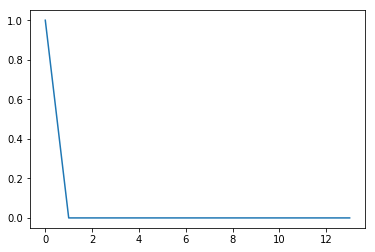

In [12]:
pca_mod = PCA(n_components = 14)
pca_mod.fit(train_data)
    
# Explained variance for each
pcavar = pca_mod.explained_variance_ratio_
plt.plot(pcavar)

C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


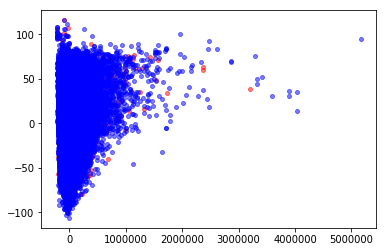

In [13]:
pca_mod = PCA(n_components=2)
pcadat = pca_mod.fit_transform(train_data)
d = pd.DataFrame(data=pcadat, columns=["Principal Component 1", "Principal Component 2"])
exp = d[y == 1]
cln = d[y == 0]
plt.plot(exp["Principal Component 1"], exp["Principal Component 2"], 'ro', cln["Principal Component 1"], cln["Principal Component 2"], 'bo', markersize = 4, alpha = .5)

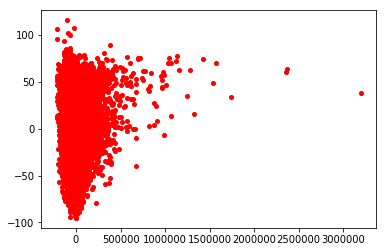

In [14]:
plt.plot(exp["Principal Component 1"], exp["Principal Component 2"], 'ro', markersize = 4)

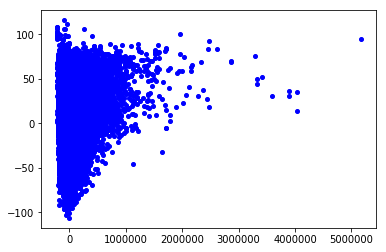

In [15]:
plt.plot(cln["Principal Component 1"], cln["Principal Component 2"], 'bo', markersize = 4)

C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


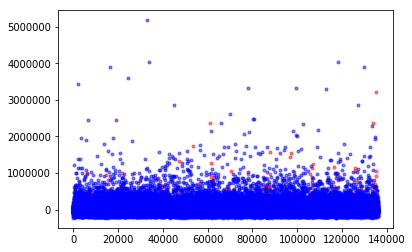

In [16]:
pca_mod = PCA(n_components=1)
pcadat = pca_mod.fit_transform(train_data)
d = pd.DataFrame(data=pcadat, columns=["Principal Component 1"])
exp = d[y == 1]
cln = d[y == 0]
plt.plot(exp["Principal Component 1"], 'ro', cln["Principal Component 1"], 'bo', markersize = 3, alpha = .5)

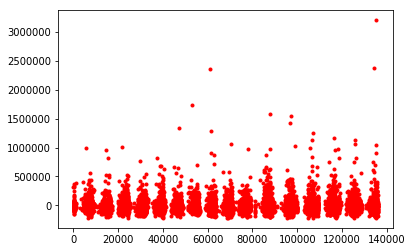

In [17]:
plt.plot(exp["Principal Component 1"], 'ro', markersize = 3)

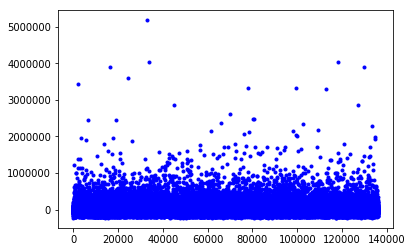

In [18]:
plt.plot(cln["Principal Component 1"], 'bo', markersize = 3)

In [393]:
train_labels = train_labels.reset_index(drop = True)
test_labels = test_labels.reset_index(drop = True)
train_data = train_data.reset_index(drop = True)
test_data = test_data.reset_index(drop = True)

dat = pd.DataFrame(columns=["Type of Covariance", "Number of PCA Components", "Number of GMM Components", "Parameters", "Accuracy"])
l = 0
    
    # Start of Function
    # Values of PCA Components
for i in range(1, 14):
        # Fit the PCA, get Pos and Neg
    pca_mod = PCA(n_components=i)
    pcadat=pca_mod.fit_transform(train_data) 
    data = pd.DataFrame(data=pcadat)
        
    pca_mod2 = PCA(n_components = i)
    pcadat2 = pca_mod2.fit_transform(test_data) 
    data2 = pd.DataFrame(data=pcadat2)
            
    expsongs = data[train_labels == 1]
    explabels = train_labels[train_labels == 0]
    

    clnsongs = data[train_labels == 1]
    clnlabels = train_labels[train_labels == 0]
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8, 18]:
        
        params = 2 * (j + (j - 1) + (j*np.sum(range(1, i+1))))
                
        modelpop = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelpop.fit(expsongs, explabels)
        
        modelrap = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelrap.fit(clnsongs, clnlabels)
            
        poslik = modelpop.score_samples(data2)
        neglik = modelrap.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            if poslik[k] > neglik[k]:
                labs.append(1)
            else:
                labs.append(0)
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        if sum(labs) == 0:
            totalacc = 0
        else:
            totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Full", i, j, params, totalacc]
        l += 1
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        params = 2 * ((2*j - 1) + i*j)
            
        modelpos = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelpos.fit(expsongs, explabels)
        
        modelneg = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelneg.fit(clnsongs, clnlabels)
            
        poslik = modelpos.score_samples(data2)
        neglik = modelneg.score_samples(data2)
                
                 # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            if poslik[k] > neglik[k]:
                labs.append(1)
            else:
                labs.append(0)
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        if sum(labs) == 0:
            totalacc = 0
        else:
            totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Diag", i, j, params, totalacc]
        l += 1
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        params = 2 * (3*j - 1)
            
        modelpos = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelpos.fit(expsongs, explabels)
        
        modelneg = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelneg.fit(clnsongs, clnlabels)
            
        poslik = modelpos.score_samples(data2)
        neglik = modelneg.score_samples(data2)
            
            # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            if poslik[k] > neglik[k]:
                labs.append(1)
            else:
                labs.append(0)
    
            # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
                    
        if sum(labs) == 0:
            totalacc = 0
        else:
            totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Spherical", i, j, params, totalacc]
        l += 1
        
    for j in range(1, 13):
        params = 2 * (np.sum(range(1, i)) + 2*j - 1)
                
        modelpos = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelpos.fit(expsongs, explabels)
                
        modelneg = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelneg.fit(clnsongs, clnlabels)
                
        poslik = modelpos.score_samples(data2)
        neglik = modelneg.score_samples(data2)
                
                # Label More Likely outcome
        labs = []
        for k in range(len(poslik)):
            if poslik[k] > neglik[k]:
                labs.append(1)
            else:
                labs.append(0)
    
                # Get accuracy
        acc = []
        for k in range(len(labs)):
            if labs[k] == test_labels[k]:
                acc.append(1)
            else:
                acc.append(0)
        
        if sum(labs) == 0:
            totalacc = 0
        else:
            totalacc = sum(acc) / len(acc)
            
        dat.loc[l] = ["Tied", i, j, params, totalacc]
        l += 1

dat[dat["Accuracy"] == max(dat["Accuracy"])]

C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\Users\Isaac\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


,Type of Covariance,Number of PCA Components,Number of GMM Components,Parameters,Accuracy
0,Full,1,1,4,0
1,Full,1,2,10,0
2,Full,1,3,16,0
3,Full,1,4,22,0
4,Full,1,5,28,0
5,Full,1,6,34,0
6,Full,1,7,40,0
7,Full,1,8,46,0
8,Full,1,18,106,0
9,Diag,1,1,4,0


In [21]:
train_labels = train_labels.reset_index(drop = True)
test_labels = test_labels.reset_index(drop = True)
train_data = train_data.reset_index(drop = True)
test_data = test_data.reset_index(drop = True)

pca_mod = PCA(n_components=1)
pcadat=pca_mod.fit_transform(train_data) 
data = pd.DataFrame(data=pcadat)
        
pca_mod2 = PCA(n_components = 1)
pcadat2 = pca_mod2.fit_transform(test_data) 
data2 = pd.DataFrame(data=pcadat2)
            
expsongs = data[train_labels == 1]
explabels = train_labels[train_labels == 0]
    

clnsongs = data[train_labels == 1]
clnlabels = train_labels[train_labels == 0]

modelpop = GaussianMixture(n_components=1,covariance_type='full',random_state=12345)
modelpop.fit(expsongs, explabels)
        
modelrap = GaussianMixture(n_components=1,covariance_type='full',random_state=12345)
modelrap.fit(clnsongs, clnlabels)
            
poslik = modelpop.score_samples(data2)
neglik = modelrap.score_samples(data2)
                
                 # Label More Likely outcome
labs = []
for k in range(len(poslik)):
    if poslik[k] > neglik[k]:
        labs.append(1)
    else:
        labs.append(0)
    
                # Get accuracy
acc = []
for k in range(len(labs)):
    if labs[k] == test_labels[k]:
        acc.append(1)
    else:
        acc.append(0)
                    
totalacc = sum(acc) / len(acc)
totalacc

0.9143075745983168

In [22]:
# 91% from predicting only clean
# Same issue, only predicts 0
sum(labs)

0

In [26]:
dat = pd.DataFrame(columns=["Type of Covariance", "Number of PCA Components", "Number of GMM Components EXP", "Number of GMM Components CLN", "Parameters", "Accuracy"])
l = 0
    
    # Start of Function
    # Values of PCA Components
for i in range(1, 7):
        # Fit the PCA, get Pos and Neg
    pca_mod = PCA(n_components=i)
    pcadat=pca_mod.fit_transform(train_data) 
    data = pd.DataFrame(data=pcadat)
        
    pca_mod2 = PCA(n_components = i)
    pcadat2 = pca_mod2.fit_transform(test_data) 
    data2 = pd.DataFrame(data=pcadat2)
            
    expsongs = data[train_labels == 1]
    explabels = train_labels[train_labels == 0]
    

    clnsongs = data[train_labels == 1]
    clnlabels = train_labels[train_labels == 0]
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8, 18]:
        
        params = 2 * (j + (j - 1) + (j*np.sum(range(1, i+1))))
                
        modelpop = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelpop.fit(expsongs, explabels)
        for m in [1, 2, 3, 4, 5, 6, 7, 8]:
        
            modelrap = GaussianMixture(n_components=m,covariance_type='full',random_state=12345)
            modelrap.fit(clnsongs, clnlabels)
            
            poslik = modelpop.score_samples(data2)
            neglik = modelrap.score_samples(data2)
                
                 # Label More Likely outcome
            labs = []
            for k in range(len(poslik)):
                if poslik[k] > neglik[k]:
                    labs.append(1)
                else:
                    labs.append(0)
    
                # Get accuracy
            acc = []
            for k in range(len(labs)):
                if labs[k] == test_labels[k]:
                    acc.append(1)
                else:
                    acc.append(0)
                    
            if sum(labs) == 0:
                totalacc = 0
            else:
                totalacc = sum(acc) / len(acc)
            
            dat.loc[l] = ["Full", i, j, m, params, totalacc]
            l += 1
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        params = 2 * ((2*j - 1) + i*j)
            
        modelpos = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelpos.fit(expsongs, explabels)
        
        for m in [1,2,3,4,5,6,7,8]:
        
            modelneg = GaussianMixture(n_components=m,covariance_type='diag',random_state=12345)
            modelneg.fit(clnsongs, clnlabels)
            
            poslik = modelpos.score_samples(data2)
            neglik = modelneg.score_samples(data2)
                
                 # Label More Likely outcome
            labs = []
            for k in range(len(poslik)):
                if poslik[k] > neglik[k]:
                    labs.append(1)
                else:
                    labs.append(0)
    
                # Get accuracy
            acc = []
            for k in range(len(labs)):
                if labs[k] == test_labels[k]:
                    acc.append(1)
                else:
                    acc.append(0)
                    
            if sum(labs) == 0:
                totalacc = 0
            else:
                totalacc = sum(acc) / len(acc)
            
            dat.loc[l] = ["Diag", i, j, m, params, totalacc]
            l += 1
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        params = 2 * (3*j - 1)
            
        modelpos = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelpos.fit(expsongs, explabels)
        
        for m in [1, 2, 3, 4, 5, 6, 7, 8]:
            modelneg = GaussianMixture(n_components=m,covariance_type='spherical',random_state=12345)
            modelneg.fit(clnsongs, clnlabels)
            
            poslik = modelpos.score_samples(data2)
            neglik = modelneg.score_samples(data2)
            
            # Label More Likely outcome
            labs = []
            for k in range(len(poslik)):
                if poslik[k] > neglik[k]:
                    labs.append(1)
                else:
                    labs.append(0)
    
            # Get accuracy
            acc = []
            for k in range(len(labs)):
                if labs[k] == test_labels[k]:
                    acc.append(1)
                else:
                    acc.append(0)
                    
            if sum(labs) == 0:
                totalacc = 0
            else:
                totalacc = sum(acc) / len(acc)
            
            dat.loc[l] = ["Spherical", i, j, m, params, totalacc]
            l += 1
        
    for j in range(1, 13):
        params = 2 * (np.sum(range(1, i)) + 2*j - 1)
                
        modelpos = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelpos.fit(expsongs, explabels)
                
        for m in [1, 2, 3, 4, 5, 6, 7, 8]:
            modelneg = GaussianMixture(n_components=m,covariance_type='tied',random_state=12345)
            modelneg.fit(clnsongs, clnlabels)
                
            poslik = modelpos.score_samples(data2)
            neglik = modelneg.score_samples(data2)
                
                # Label More Likely outcome
            labs = []
            for k in range(len(poslik)):
                if poslik[k] > neglik[k]:
                    labs.append(1)
                else:
                    labs.append(0)
    
                # Get accuracy
            acc = []
            for k in range(len(labs)):
                if labs[k] == test_labels[k]:
                    acc.append(1)
                else:
                    acc.append(0)
        
            if sum(labs) == 0:
                totalacc = 0
            else:
                totalacc = sum(acc) / len(acc)
            
            dat.loc[l] = ["Tied", i, j, m, params, totalacc]
            l += 1

dat[dat["Accuracy"] == max(dat["Accuracy"])]

,Type of Covariance,Number of PCA Components,Number of GMM Components EXP,Number of GMM Components CLN,Parameters,Accuracy
1623,Spherical,6,1,8,4,0.886293


In [31]:
pca_mod = PCA(n_components=6)
pcadat=pca_mod.fit_transform(train_data) 
data = pd.DataFrame(data=pcadat)
        
pca_mod2 = PCA(n_components = 6)
pcadat2 = pca_mod2.fit_transform(test_data) 
data2 = pd.DataFrame(data=pcadat2)
            
expsongs = data[train_labels == 1]
explabels = train_labels[train_labels == 0]
    

clnsongs = data[train_labels == 1]
clnlabels = train_labels[train_labels == 0]

modelpop = GaussianMixture(n_components=1,covariance_type='spherical',random_state=12345)
modelpop.fit(expsongs, explabels)
        
modelrap = GaussianMixture(n_components=8,covariance_type='spherical',random_state=12345)
modelrap.fit(clnsongs, clnlabels)
            
poslik = modelpop.score_samples(data2)
neglik = modelrap.score_samples(data2)
                
                 # Label More Likely outcome
labs = []
for k in range(len(poslik)):
    if poslik[k] > neglik[k]:
        labs.append(1)
    else:
        labs.append(0)
    
                # Get accuracy
acc = []
for k in range(len(labs)):
    if labs[k] == test_labels[k]:
        acc.append(1)
    else:
        acc.append(0)
                    
totalacc = sum(acc) / len(acc)
totalacc

0.8862927432169972

In [32]:
sum(labs)

1044

In [33]:
len(test_data)

33982

In [34]:
dat = pd.DataFrame(columns=["Type of Covariance", "Number of PCA Components", "Number of GMM Components EXP", "Number of GMM Components CLN", "Parameters", "Accuracy"])
l = 0
    
    # Start of Function
    # Values of PCA Components
for i in range(1, 7):
        # Fit the PCA, get Pos and Neg
    pca_mod = PCA(n_components=i)
    pcadat=pca_mod.fit_transform(train_data) 
    data = pd.DataFrame(data=pcadat)
        
    pca_mod2 = PCA(n_components = i)
    pcadat2 = pca_mod2.fit_transform(test_data) 
    data2 = pd.DataFrame(data=pcadat2)
            
    expsongs = data[train_labels == 1]
    explabels = train_labels[train_labels == 0]
    

    clnsongs = data[train_labels == 1]
    clnlabels = train_labels[train_labels == 0]
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8, 18]:
        
        params = 2 * (j + (j - 1) + (j*np.sum(range(1, i+1))))
                
        modelpop = GaussianMixture(n_components=j,covariance_type='full',random_state=12345)
        modelpop.fit(expsongs, explabels)
        for m in [1, 2, 3, 4, 5, 6, 7, 8]:
        
            modelrap = GaussianMixture(n_components=m,covariance_type='full',random_state=12345)
            modelrap.fit(clnsongs, clnlabels)
            
            poslik = modelpop.score_samples(data2)
            neglik = modelrap.score_samples(data2)
                
                 # Label More Likely outcome
            labs = []
            for k in range(len(poslik)):
                if poslik[k] > neglik[k]:
                    labs.append(1)
                else:
                    labs.append(0)
    
                # Get accuracy
            acc = []
            for k in range(len(labs)):
                if labs[k] == test_labels[k]:
                    acc.append(1)
                else:
                    acc.append(0)
                    
            if sum(labs) < 3000:
                totalacc = 0
            else:
                totalacc = sum(acc) / len(acc)
            
            dat.loc[l] = ["Full", i, j, m, params, totalacc]
            l += 1
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        params = 2 * ((2*j - 1) + i*j)
            
        modelpos = GaussianMixture(n_components=j,covariance_type='diag',random_state=12345)
        modelpos.fit(expsongs, explabels)
        
        for m in [1,2,3,4,5,6,7,8]:
        
            modelneg = GaussianMixture(n_components=m,covariance_type='diag',random_state=12345)
            modelneg.fit(clnsongs, clnlabels)
            
            poslik = modelpos.score_samples(data2)
            neglik = modelneg.score_samples(data2)
                
                 # Label More Likely outcome
            labs = []
            for k in range(len(poslik)):
                if poslik[k] > neglik[k]:
                    labs.append(1)
                else:
                    labs.append(0)
    
                # Get accuracy
            acc = []
            for k in range(len(labs)):
                if labs[k] == test_labels[k]:
                    acc.append(1)
                else:
                    acc.append(0)
                    
            if sum(labs) < 3000:
                totalacc = 0
            else:
                totalacc = sum(acc) / len(acc)
            
            dat.loc[l] = ["Diag", i, j, m, params, totalacc]
            l += 1
    
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        params = 2 * (3*j - 1)
            
        modelpos = GaussianMixture(n_components=j,covariance_type='spherical',random_state=12345)
        modelpos.fit(expsongs, explabels)
        
        for m in [1, 2, 3, 4, 5, 6, 7, 8]:
            modelneg = GaussianMixture(n_components=m,covariance_type='spherical',random_state=12345)
            modelneg.fit(clnsongs, clnlabels)
            
            poslik = modelpos.score_samples(data2)
            neglik = modelneg.score_samples(data2)
            
            # Label More Likely outcome
            labs = []
            for k in range(len(poslik)):
                if poslik[k] > neglik[k]:
                    labs.append(1)
                else:
                    labs.append(0)
    
            # Get accuracy
            acc = []
            for k in range(len(labs)):
                if labs[k] == test_labels[k]:
                    acc.append(1)
                else:
                    acc.append(0)
                    
            if sum(labs) < 3000:
                totalacc = 0
            else:
                totalacc = sum(acc) / len(acc)
            
            dat.loc[l] = ["Spherical", i, j, m, params, totalacc]
            l += 1
        
    for j in range(1, 13):
        params = 2 * (np.sum(range(1, i)) + 2*j - 1)
                
        modelpos = GaussianMixture(n_components=j,covariance_type='tied',random_state=12345)
        modelpos.fit(expsongs, explabels)
                
        for m in [1, 2, 3, 4, 5, 6, 7, 8]:
            modelneg = GaussianMixture(n_components=m,covariance_type='tied',random_state=12345)
            modelneg.fit(clnsongs, clnlabels)
                
            poslik = modelpos.score_samples(data2)
            neglik = modelneg.score_samples(data2)
                
                # Label More Likely outcome
            labs = []
            for k in range(len(poslik)):
                if poslik[k] > neglik[k]:
                    labs.append(1)
                else:
                    labs.append(0)
    
                # Get accuracy
            acc = []
            for k in range(len(labs)):
                if labs[k] == test_labels[k]:
                    acc.append(1)
                else:
                    acc.append(0)
        
            if sum(labs) < 3000:
                totalacc = 0
            else:
                totalacc = sum(acc) / len(acc)
            
            dat.loc[l] = ["Tied", i, j, m, params, totalacc]
            l += 1

dat[dat["Accuracy"] == max(dat["Accuracy"])]

,Type of Covariance,Number of PCA Components,Number of GMM Components EXP,Number of GMM Components CLN,Parameters,Accuracy
741,Spherical,3,2,6,10,0.847213


In [35]:
pca_mod = PCA(n_components=3)
pcadat=pca_mod.fit_transform(train_data) 
data = pd.DataFrame(data=pcadat)
        
pca_mod2 = PCA(n_components = 3)
pcadat2 = pca_mod2.fit_transform(test_data) 
data2 = pd.DataFrame(data=pcadat2)
            
expsongs = data[train_labels == 1]
explabels = train_labels[train_labels == 0]
    

clnsongs = data[train_labels == 1]
clnlabels = train_labels[train_labels == 0]

modelpop = GaussianMixture(n_components=2,covariance_type='spherical',random_state=12345)
modelpop.fit(expsongs, explabels)
        
modelrap = GaussianMixture(n_components=6,covariance_type='spherical',random_state=12345)
modelrap.fit(clnsongs, clnlabels)
            
poslik = modelpop.score_samples(data2)
neglik = modelrap.score_samples(data2)
                
                 # Label More Likely outcome
labs = []
for k in range(len(poslik)):
    if poslik[k] > neglik[k]:
        labs.append(1)
    else:
        labs.append(0)
    
                # Get accuracy
acc = []
for k in range(len(labs)):
    if labs[k] == test_labels[k]:
        acc.append(1)
    else:
        acc.append(0)
                    
totalacc = sum(acc) / len(acc)
totalacc

0.847213230533812

In [36]:
sum(labs)

3190